In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
from IPython import display
from imputation_utils import char_groupings, char_maps

data = np.load('../data/raw_rank_trunk_chars.npz')
percentile_rank_chars = data['rank_chars']
regular_chars = data['raw_chars']
chars = data['chars']
dates = data['dates']
return_panel = data['returns']
permnos = data['permnos']
rts = data['rfs']
monthly_updates = data['monthly_updates']

from plots_and_tables import section_2

# Section 2

## Figure 1: Missing Values over Time

This figure summarizes missing values over time. Subfigure (a) shows the total number of stocks and
those that have observed values for our five example characteristics book-to-market (B2M), operating profitability (OP), investment (INV, growth in total assets), leverage (LEV) and real investment (defined as the
change in property, plants, equipment and inventory) over lagged total assets (DPI2A). Subfigures (b) and
(c) show the percentage and share of the total market value of missing observations for the five example
characteristics. Subfigure (d) plots the percentage of missing observations for quarterly and monthly updated characteristics based on equal and market capitalization-weighted averages. Subfigure (e) shows the
percentage of missing observations by market capitalization quintiles. Subfigure (f) displays the proportion of missing stocks that have no missing observations or at most 3, 15 or 35 missing characteristics at
a given point in time.

CPU times: user 3.66 s, sys: 406 ms, total: 4.07 s
Wall time: 3.34 s


saving to save_loc


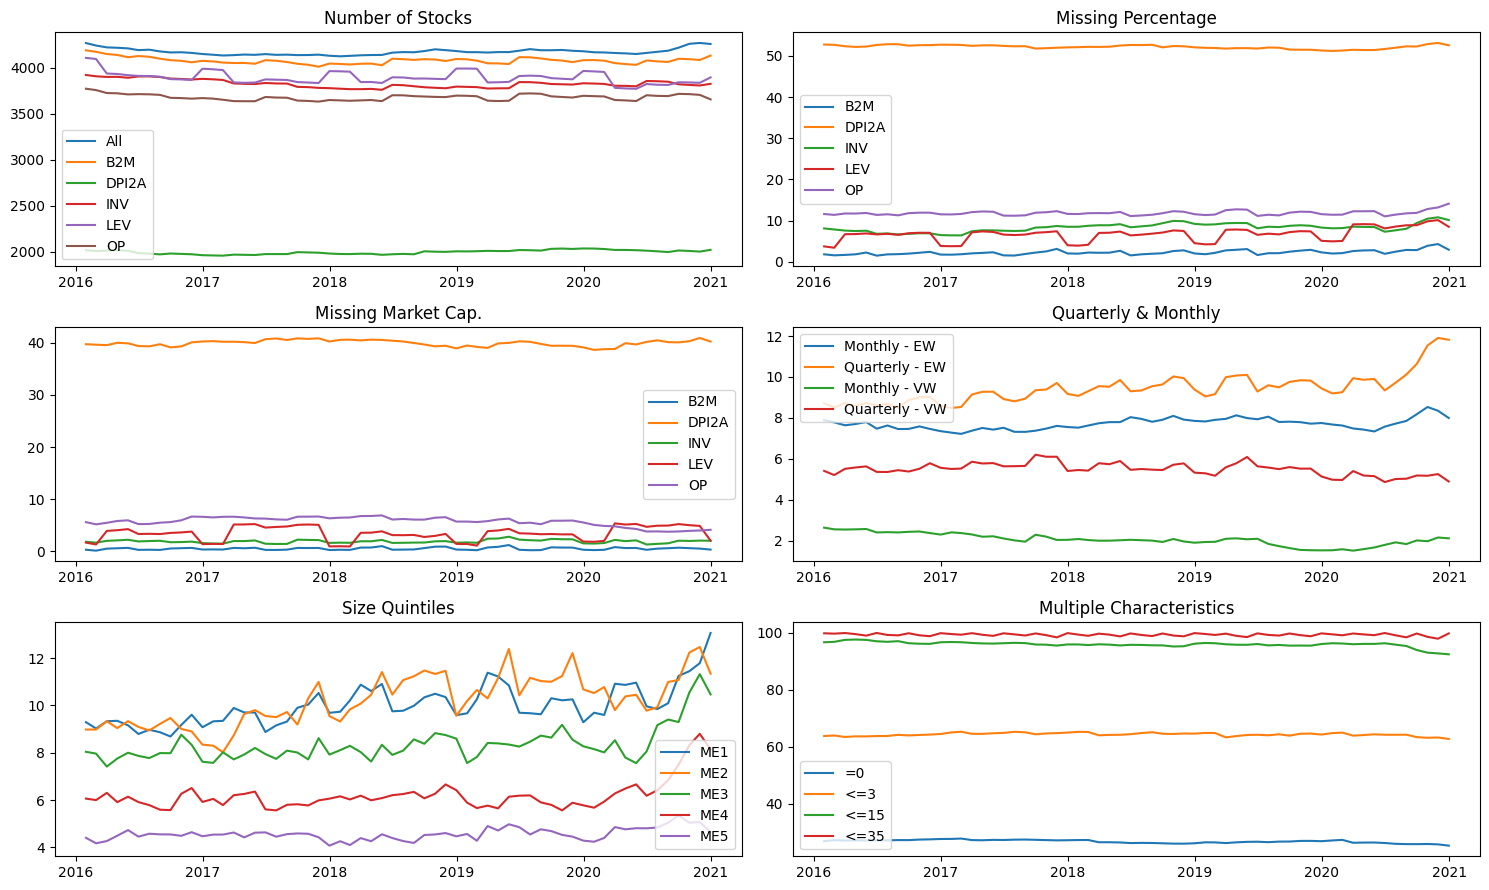

CPU times: user 4.71 s, sys: 627 ms, total: 5.34 s
Wall time: 4.56 s


In [2]:
%%time 

plot = section_2.MissingValuesOverTime()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
plot.run()


## Figure2: Missing Observations by Characteristic

This figure shows the average percentage of missing observations for each characteristic. We decompose
the missing values in those missing at the start (no previous observations), the middle (some previous and
future observations), the end (no further observations) and completely missing.

### Note, because the data is truncated to the last 60 months, we do not include the "completely-missing" stocks, these can be included by siwtching the `ignore_fully_missing` flag

CPU times: user 1min 43s, sys: 2.65 s, total: 1min 46s
Wall time: 1min 48s

saving to save_loc


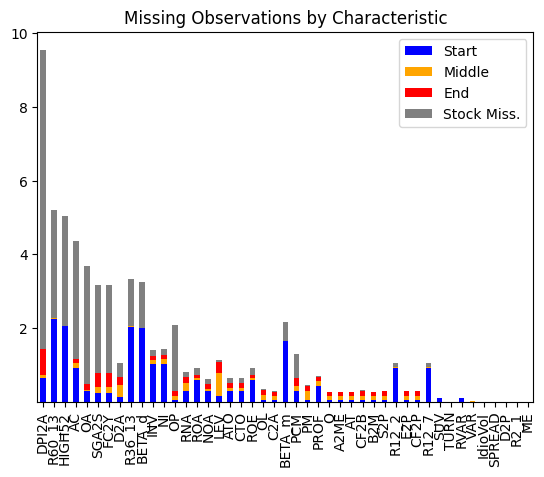

CPU times: user 4min 2s, sys: 20.5 s, total: 4min 22s
Wall time: 12min 56s


In [3]:
%%time 

plot = section_2.MissingObservationByCharacteristic()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates,
          ignore_fully_missing=True, first_mean_permno=True)
plot.run()

## Figure 3: Missing Observations by Characteristic Quintiles
This figure shows the percentage of missing observations for different characteristic quintiles. The left
subfigure displays the missing observations for all characteristics and the example characteristics bookto-market, operating profitability, investment, leverage and change in property, plants, equipment and
inventory over lagged total assets for the five size quintiles of stocks. The right subfigure presents the
proportion of missing values for the five example characteristics for their corresponding characteristic
quintile. The characteristic quintiles are based on the average observed characteristic value of the corresponding stock.

CPU times: user 2.15 s, sys: 126 ms, total: 2.27 s
Wall time: 1.9 s

saving to save_loc


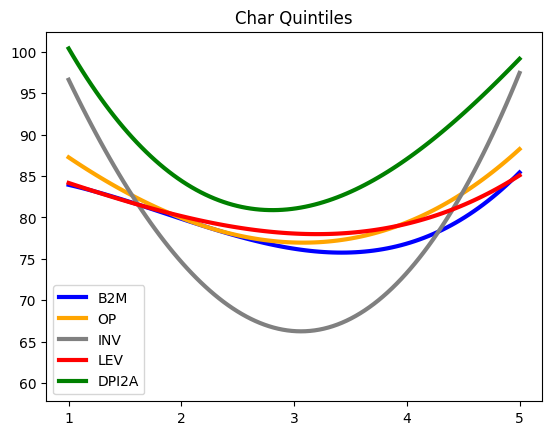

CPU times: user 3.74 s, sys: 2.46 s, total: 6.2 s
Wall time: 17.6 s


In [4]:
%%time 

plot = section_2.MissingObservationByCharacteristicQuintile()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
plot.run()

# for c in cc

saving to save_loc


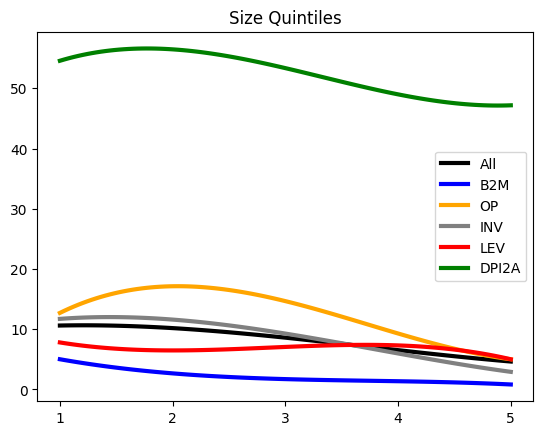

CPU times: user 3 s, sys: 1.7 s, total: 4.71 s
Wall time: 14 s


In [5]:
%%time 

plot = section_2.MissingObservationBySizeQuintile()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
plot.run()

### Table 1: Logistic Regressions Explaining Missingess
This table shows the results of logistic regressions to predict the missingness of individual stock characteristics. We report the results for different sets of explanatory variables for characteristics missing at the beginning, in the middle and at the end. The values of the seven characteristics D2P, IdioVol, ME, R2_1, SPREAD, TURN and VAR are always observed and hence can be included in the regressions. We also include characteristic fixed effects (FE), an indictor variable if the last characteristic value was observed, and the length of a missingness if the last value was not observed. The area under the curve (AUC) measures the accuracy of the logistic regression. The regression is pooled over time, stocks, and characteristics. The model is estimated on the training data (1988-1998) and evaluated out-of-sample on the test data (1999-2020). We also include the z-scores of the regression coefficients in brackets. Stars indicate the statistical
significance, where *** corresponds to 1% significance.

CPU times: user 8min 39s, sys: 2min 42s, total: 11min 22s
Wall time: 12min 14s

In [6]:
%%time 

plot = section_2.MissingLogitRegressions()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings, 
       monthly_updates)
plot.run()


  0%|          | 0/5 [00:00<?, ?it/s]

D2P & IdioVol & ME & R2_1 & SPREAD & TURN & VAR & FE included & Last Val Indicator & Missing Gap & agg train AOC & agg  test AOC\\
-2.92*** & 7.67*** & -1.05*** & 0.27*** & -0.44*** & -0.49*** & -7.07*** &  F &  F &  F & 0.52 & 0.46\\
{[-79.83]} & {[30.67]} & {[-23.85]} & {[9.14]} & {[-7.3]} & {[-14.86]} & {[-28.79]} &  &  &  &  & \\
-1.28*** & 4.74*** & -0.3*** & 0.21*** & -0.08*** & -0.71*** & -4.32*** &  F &  F &  0.13 & 0.65 & 0.74\\
{[-25.94]} & {[16.22]} & {[-5.6]} & {[6.09]} & {[-1.18]} & {[-18.34]} & {[-15.23]} &  &  & {[ 97.29]} &  & \\
 &  &  &  &  &  &  &  T &  F &  F & 0.75 & 0.74\\
 &  &  &  &  &  &  &  &  &  &  & \\
 &  &  &  &  &  &  &  T &  F &  0.01 & 0.73 & 0.74\\
 &  &  &  &  &  &  &  &  & {[ 5.85]} &  & \\
0.4*** & 0.21*** & -0.43*** & 0.22*** & -0.61*** & -0.19*** & 0.13*** &  T &  F &  0.01 & 0.75 & 0.76\\
{[6.06]} & {[0.59]} & {[-7.24]} & {[5.59]} & {[-7.28]} & {[-4.17]} & {[0.39]} &  &  & {[ 3.15]} &  & \\


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

D2P & IdioVol & ME & R2_1 & SPREAD & TURN & VAR & FE included & Last Val Indicator & Missing Gap & agg train AOC & agg  test AOC\\
-0.4*** & 0.25*** & -0.15*** & -0.04*** & 0.42*** & -0.11*** & -0.6*** &  F &  F &  F & 0.67 & 0.67\\
{[-50.35]} & {[6.16]} & {[-13.41]} & {[-5.14]} & {[24.76]} & {[-12.31]} & {[-14.3]} &  &  &  &  & \\
 &  &  &  &  &  &  &  T &  F &  F & 0.82 & 0.81\\
 &  &  &  &  &  &  &  &  &  &  & \\
-0.4*** & 0.25*** & -0.15*** & -0.04*** & 0.42*** & -0.11*** & -0.6*** &  F &  0.1 &  F & 0.75 & 0.76\\
{[-50.3]} & {[6.15]} & {[-13.33]} & {[-5.12]} & {[24.73]} & {[-12.29]} & {[-14.3]} &  & {[ 3.93]} &  &  & \\
 &  &  &  &  &  &  &  T &  5.53 &  F & 0.9 & 0.9\\
 &  &  &  &  &  &  &  & {[ 163.54]} &  &  & \\
 &  &  &  &  &  &  &  T &  0.15 &  -6.01 & 0.91 & 0.9\\
 &  &  &  &  &  &  &  & {[ 20.93]} & {[ -50.44]} &  & \\
-0.36*** & 2.55*** & -1.4*** & -0.17*** & -0.46*** & -0.48*** & -1.57*** &  T &  0.17 &  -6.27 & 0.95 & 0.94\\
{[-5.58]} & {[5.79]} & {[-15.16]} & {[-3.2]} 

  0%|          | 0/45 [00:00<?, ?it/s]

/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['disp']
  warnings.warn(msg, ValueWarning)
/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['disp']
  warnings.warn(msg, ValueWarning)
/Users/sven/repos/stanford/research/missing_data_pub/missing_data_pubenv/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['disp']
  warnings.warn(msg, ValueWarning)


D2P & IdioVol & ME & R2_1 & SPREAD & TURN & VAR & FE included & Last Val Indicator & Missing Gap & agg train AOC & agg  test AOC\\
-0.35*** & -0.22*** & -0.38*** & -0.01*** & 0.02*** & -0.15*** & 0.08*** &  F &  F &  F & 0.61 & 0.61\\
{[-68.29]} & {[-8.33]} & {[-51.49]} & {[-2.47]} & {[2.07]} & {[-25.51]} & {[2.94]} &  &  &  &  & \\
 &  &  &  &  &  &  &  T &  F &  F & 0.83 & 0.8\\
 &  &  &  &  &  &  &  &  &  &  & \\
-1.09*** & -0.71*** & -0.86*** & -0.01*** & 0.08*** & -0.61*** & 0.38*** &  T &  F &  F & 0.85 & 0.82\\
{[-105.01]} & {[-12.75]} & {[-57.57]} & {[-1.45]} & {[3.83]} & {[-53.71]} & {[6.65]} &  &  &  &  & \\
\begin{tabular}{llllllllllll}
\toprule
D2P & IdioVol & ME & R2_1 & SPREAD & TURN & VAR & FE included & Last Val Indicator & Missing Gap & agg train AOC & agg  test AOC \\
\midrule
-2.92***  &  7.67***  &  -1.05***  &  0.27***  &  -0.44***  &  -0.49***  &  -7.07***  &   F  &   F  &   F  &  0.52  &  0.46 \\
{[-79.83]}  &  {[30.67]}  &  {[-23.85]}  &  {[9.14]}  &  {[-7.3]}  

## Figure 4: Autocorrelation of Characteristic Ranks

This figure presents the dependency of characteristic ranks and summarizes the 1-month and 12-months
autocorrelation coefficients for each characteristic.

CPU times: user 1min 20s, sys: 943 ms, total: 1min 21s
Wall time: 1min 21s

  0%|          | 0/45 [00:00<?, ?it/s]

saving to save_loc


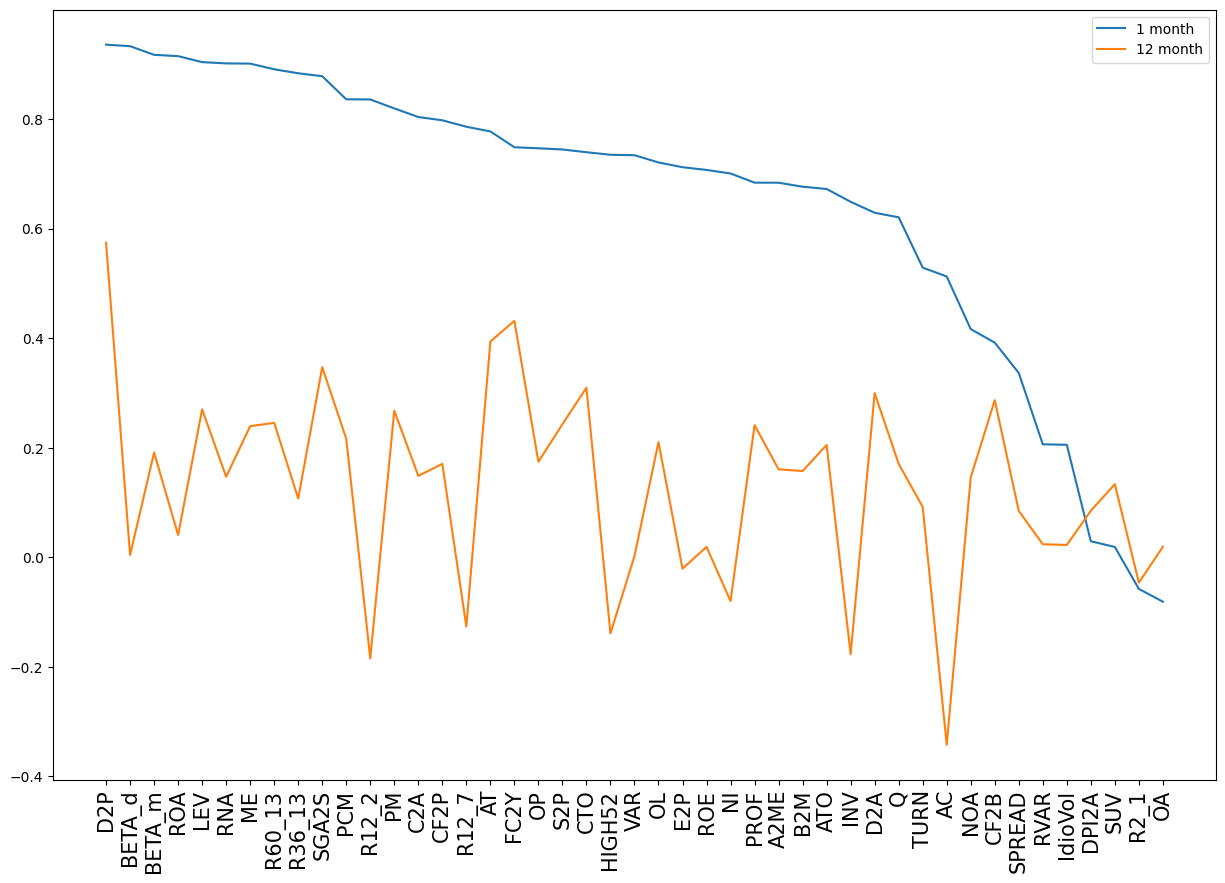

CPU times: user 1min 34s, sys: 1.98 s, total: 1min 36s
Wall time: 2min 4s


In [7]:
%%time 

plot = section_2.AutocorrOfChars()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
plot.run()


## Figure 5: Heatmap of Pairwise Correlation

CPU times: user 45min 15s, sys: 5min 9s, total: 50min 25s
Wall time: 2h 31min 11s

  0%|          | 0/22351 [00:00<?, ?it/s]

saving to save_loc


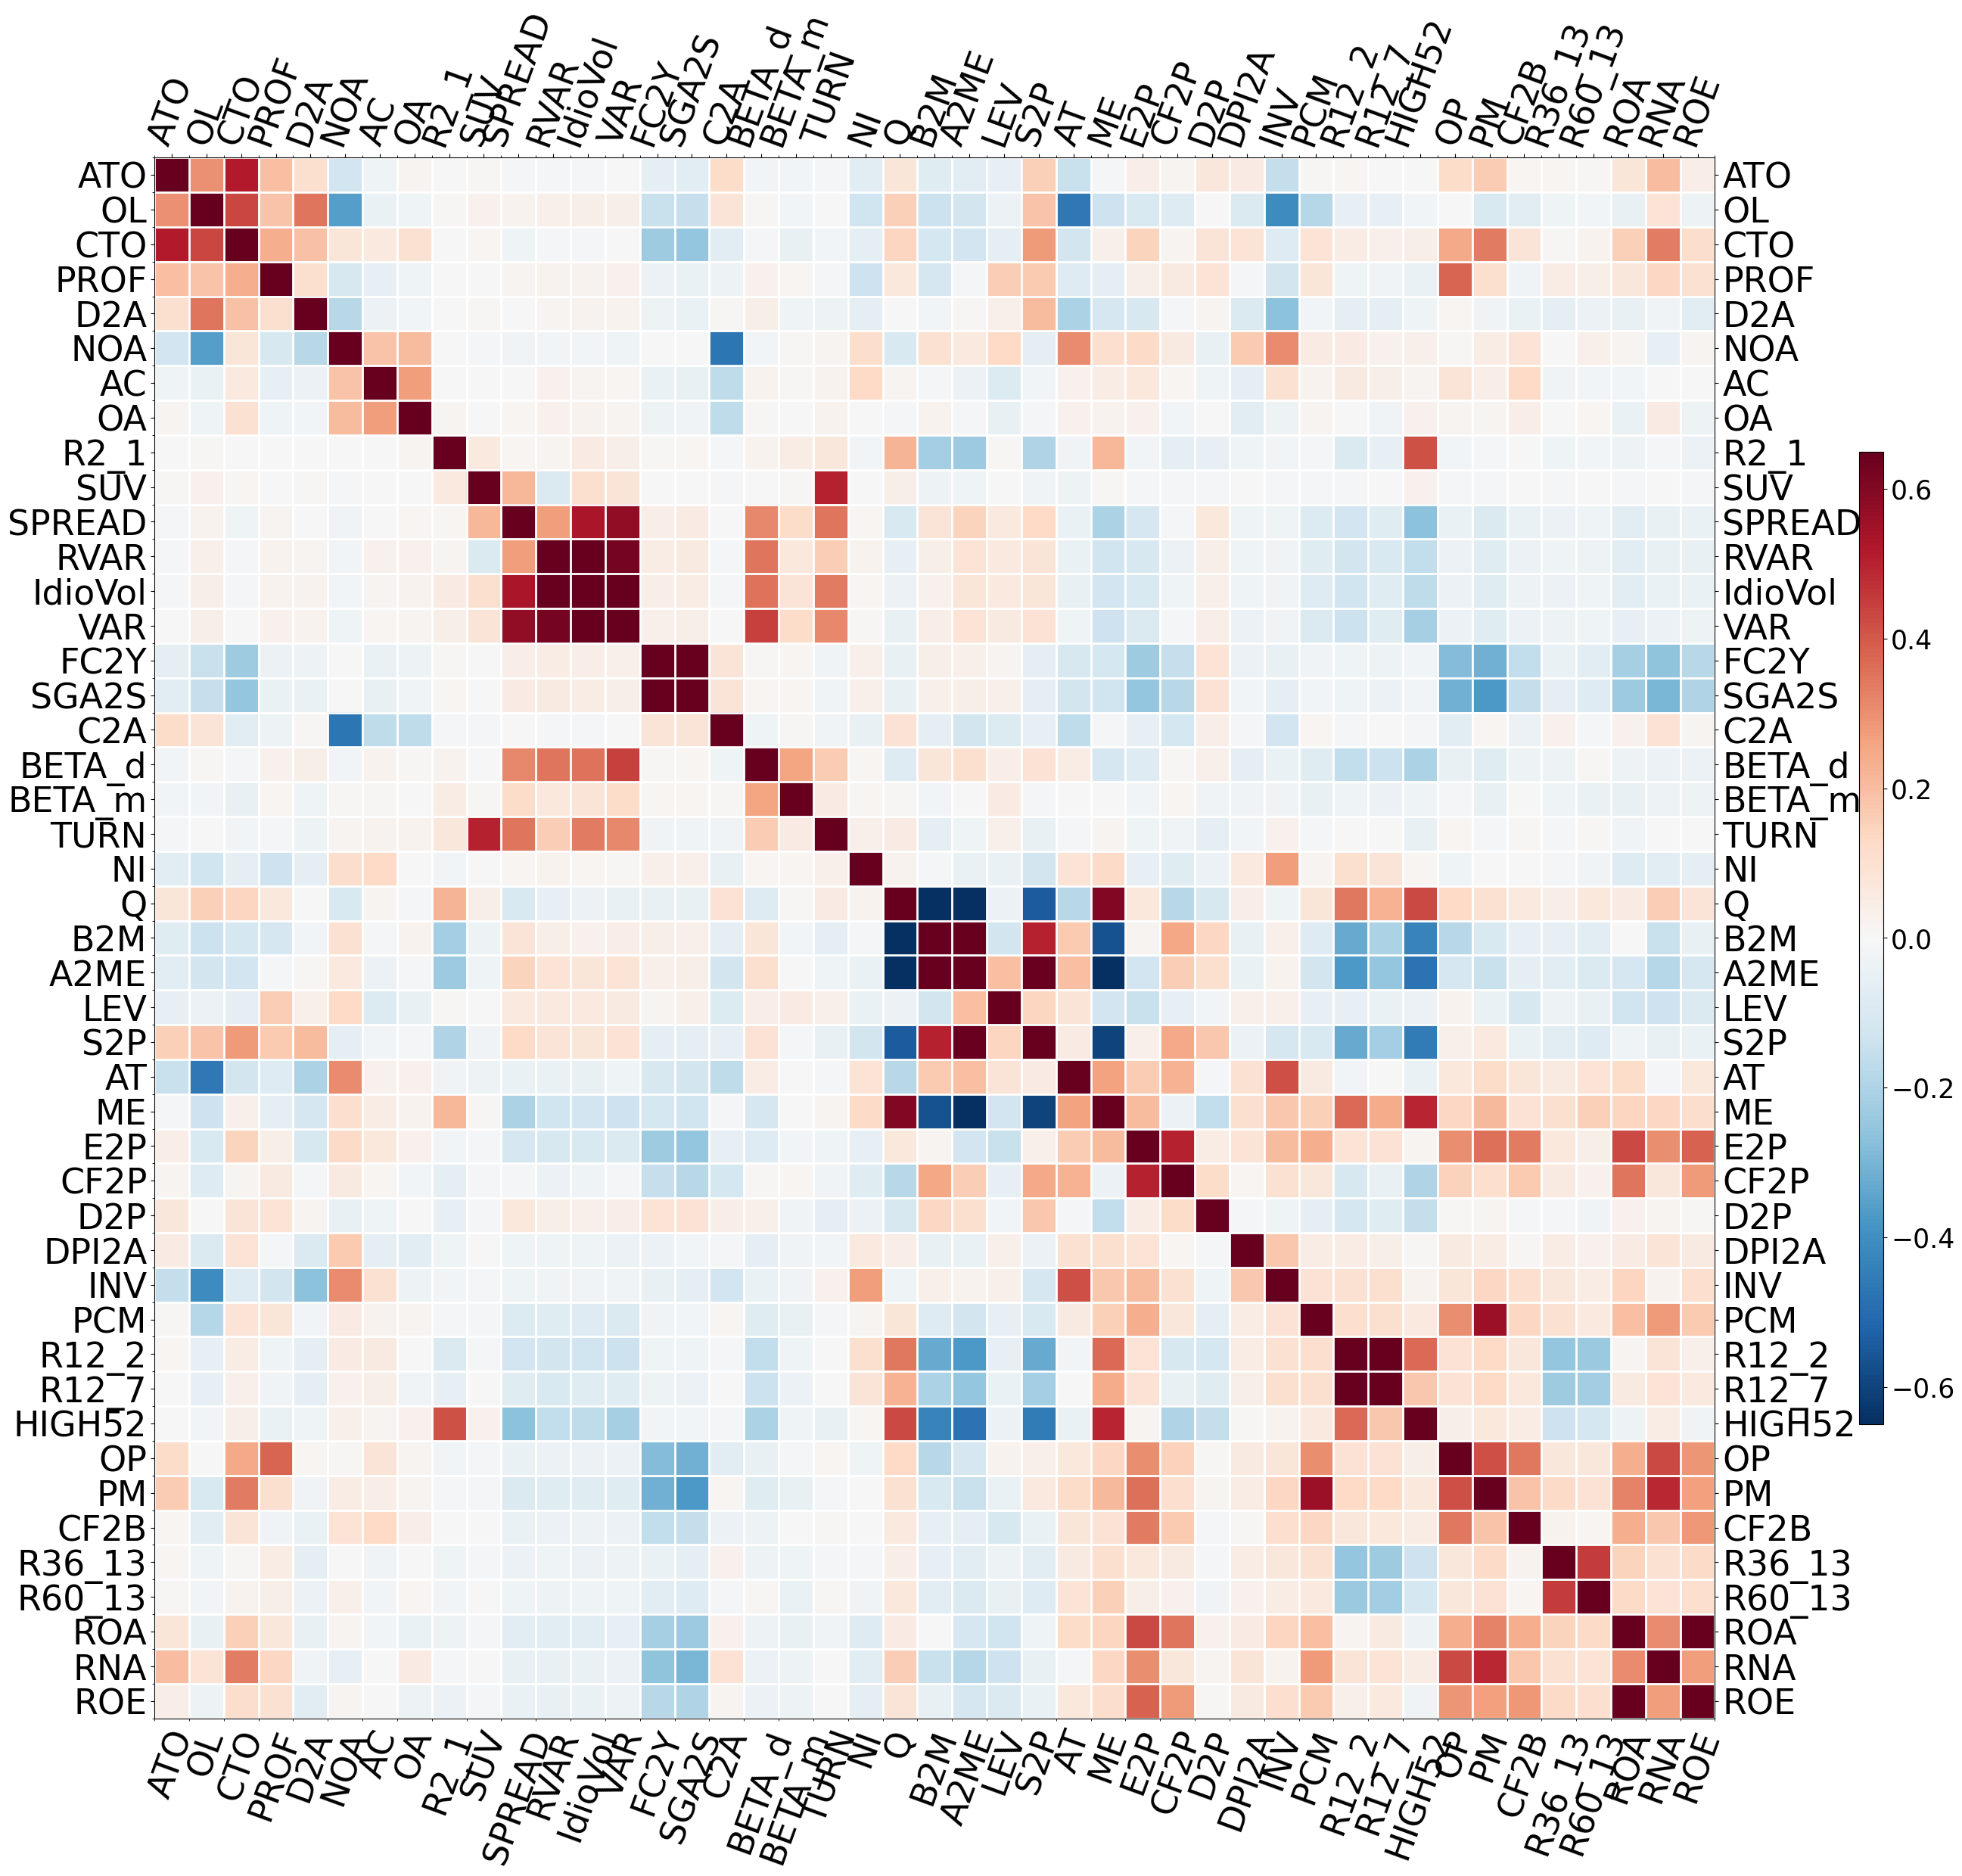

CPU times: user 45min 15s, sys: 5min 9s, total: 50min 25s
Wall time: 2h 31min 11s


In [9]:
%%time 

plot = section_2.HeatmatOfCorr()
plot.setup(percentile_rank_chars, regular_chars, return_panel, dates, permnos, chars, char_groupings, monthly_updates)
plot.run()
